# 18.06 Problem Set 8

Due Friday, November 4 at 11am.

## Problem 1 (5+5+5 points)

In this problem you will use **principal components analysis (PCA)** and the SVD to classify a large number of images.

The code below downloads a [collection of 136 images](https://math.mit.edu/~stevenj/amazon-teapots.zip) found by searching amazon.com for "teapot" in Fall 2022, shown in miniature here:

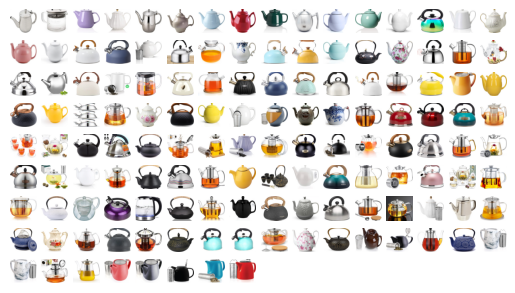

Each image is resized to a common size of $350 \times 380$, and then reshaped into a vector of $350\times380\times 3 = 399000$ numbers (the red, green, and blue intensities of each RGB color pixel), and stored in a matrix $X$ of "measurements" for 136 images:
$$
X = 136\times399000 \mbox{ matrix} = \mbox{(# images)} \times \mbox{(data per image)}
$$
Think of this as 136 points in a **399000-dimensional space**, i.e. each image is a point in $\mathbb{R}^{399000}$!!

PCA allows us to figure out which combinations of these 399000 variables explain most of the variations, and allows us to *project* from $\mathbb{R}^{399000}$ to a *much* lower-dimensional space in order to help us *classify* the data and identify *clusters* of similar images.   In this problem, you will perform the PCA clustering analysis yourself.

You will need to install some Julia packages to help extract the image data.  
```jl
import Pkg
Pkg.add("ZipFile")
Pkg.add("Images")
Pkg.add("FileIO")
```
(or type `] add ZipFile Images FileIO`).

You can then run the following code to download the data and reshape it into our $X$ matrix:

In [1]:
using ZipFile, Images, FileIO, Statistics, LinearAlgebra, PyPlot

# download the files as a zip archive:
imagezip = download("https://math.mit.edu/~stevenj/amazon-teapots.zip")

rows, cols = 350,380  # common size to resize all of the images to

# extract the images from the zip file, load them, resize them, and stick them into a big array Xdata
Xdata = Float64[]
r = ZipFile.Reader(imagezip)
for f in r.files
    # load image and rescale to rows x cols
    image = imresize(load(IOBuffer(read(f))), rows, cols)
    imagedata = Float64.(channelview(image))
    if length(imagedata) == rows*cols # grayscale
        imagedata = [imagedata; imagedata; imagedata] # convert to RGB
    end
    append!(Xdata, imagedata)
end

# remove duplicates and reshape into 136×399000 matrix X
Y = reshape(Xdata, :, length(r.files)) # reshape to (imagesize) x (numimages) matrix
X = reduce(hcat, unique(eachcol(Y)))' # remove duplicates and transpose
@show size(X)

# a useful function to reshape a length-399000 vector into a color image and plot it
function plotimg(imgdata, rows=rows, cols=cols)
    u = copy(imgdata)
    u .-= minimum(u)
    u ./= maximum(u)
    imshow(permutedims(reshape(u, 3, rows, cols), (2,3,1)))
    axis("off")
end

size(X) = (136, 399000)


plotimg (generic function with 3 methods)

Once you have the data:

**(a)** As in class, **subtract the mean of each column** of $X$ from that column to form a new matrix $A$.   (That is, subtract the mean of each pixel/color over all the images.)   `A = ....`

Given `A`, compute `U, σ, V = svd(A)` and `plot(σ, "b.-")` (be sure to add a title and axes labels too) to see the singular values $\sigma$.   As usual, some singular values should be much bigger than others.

**(b)** Compute the coefficients of the *orthogonal projection* of each mean-subtracted image (each row of `A`) onto the two dominant singular vectors \_\_\_\_\_ and \_\_\_\_\_, to obtain 136 coefficients $c_1$ and 136 coefficients $c_2$, respectively.

Plot these coefficients, along with a numeric label for the index each image, with the following code (be sure to add axes labels and a title).  You have now reduced your 399000-dimensional data into **points in 2 dimensions**.
```jl
figure(figsize=(20,15))
plot(c1, c2, "r.")
text.(c1, c2, string.(1:length(c1)), fontsize=11);
```

**(c)** In the 2d plot of (b), clusters of nearby points should represent similar teapots in some way.   Pick **three clusters** of **3 nearby points each**,  with different clusters **far** from one another in the plot from (b).   For each cluster, plot the 3 corresponding images (rows of `X`) with `plotimg`.  For example, here is how you would plot (side-by-side) the 27th, 33rd, and 49th images:
```jl
subplot(1,3,1)
plotimg(X[27,:])
subplot(1,3,2)
plotimg(X[33,:])
subplot(1,3,3)
plotimg(X[49,:])
```
You should find that the nearby (clustered) teapots are much more similar to one another (in some way) than they are to the clusters far away.

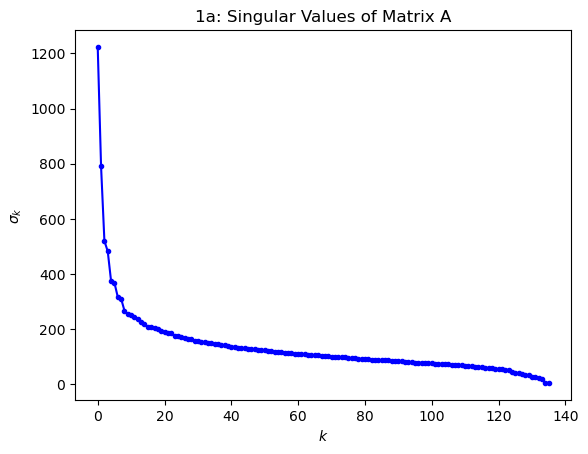

PyObject Text(0.5, 1.0, '1a: Singular Values of Matrix A')

In [2]:
# Problem 1a
A = X
A .-= mean(X)
U, σ, V = svd(A)
plot(σ, "b.-")

xlabel(L"k")
ylabel(L"\sigma_k")
title("1a: Singular Values of Matrix A")

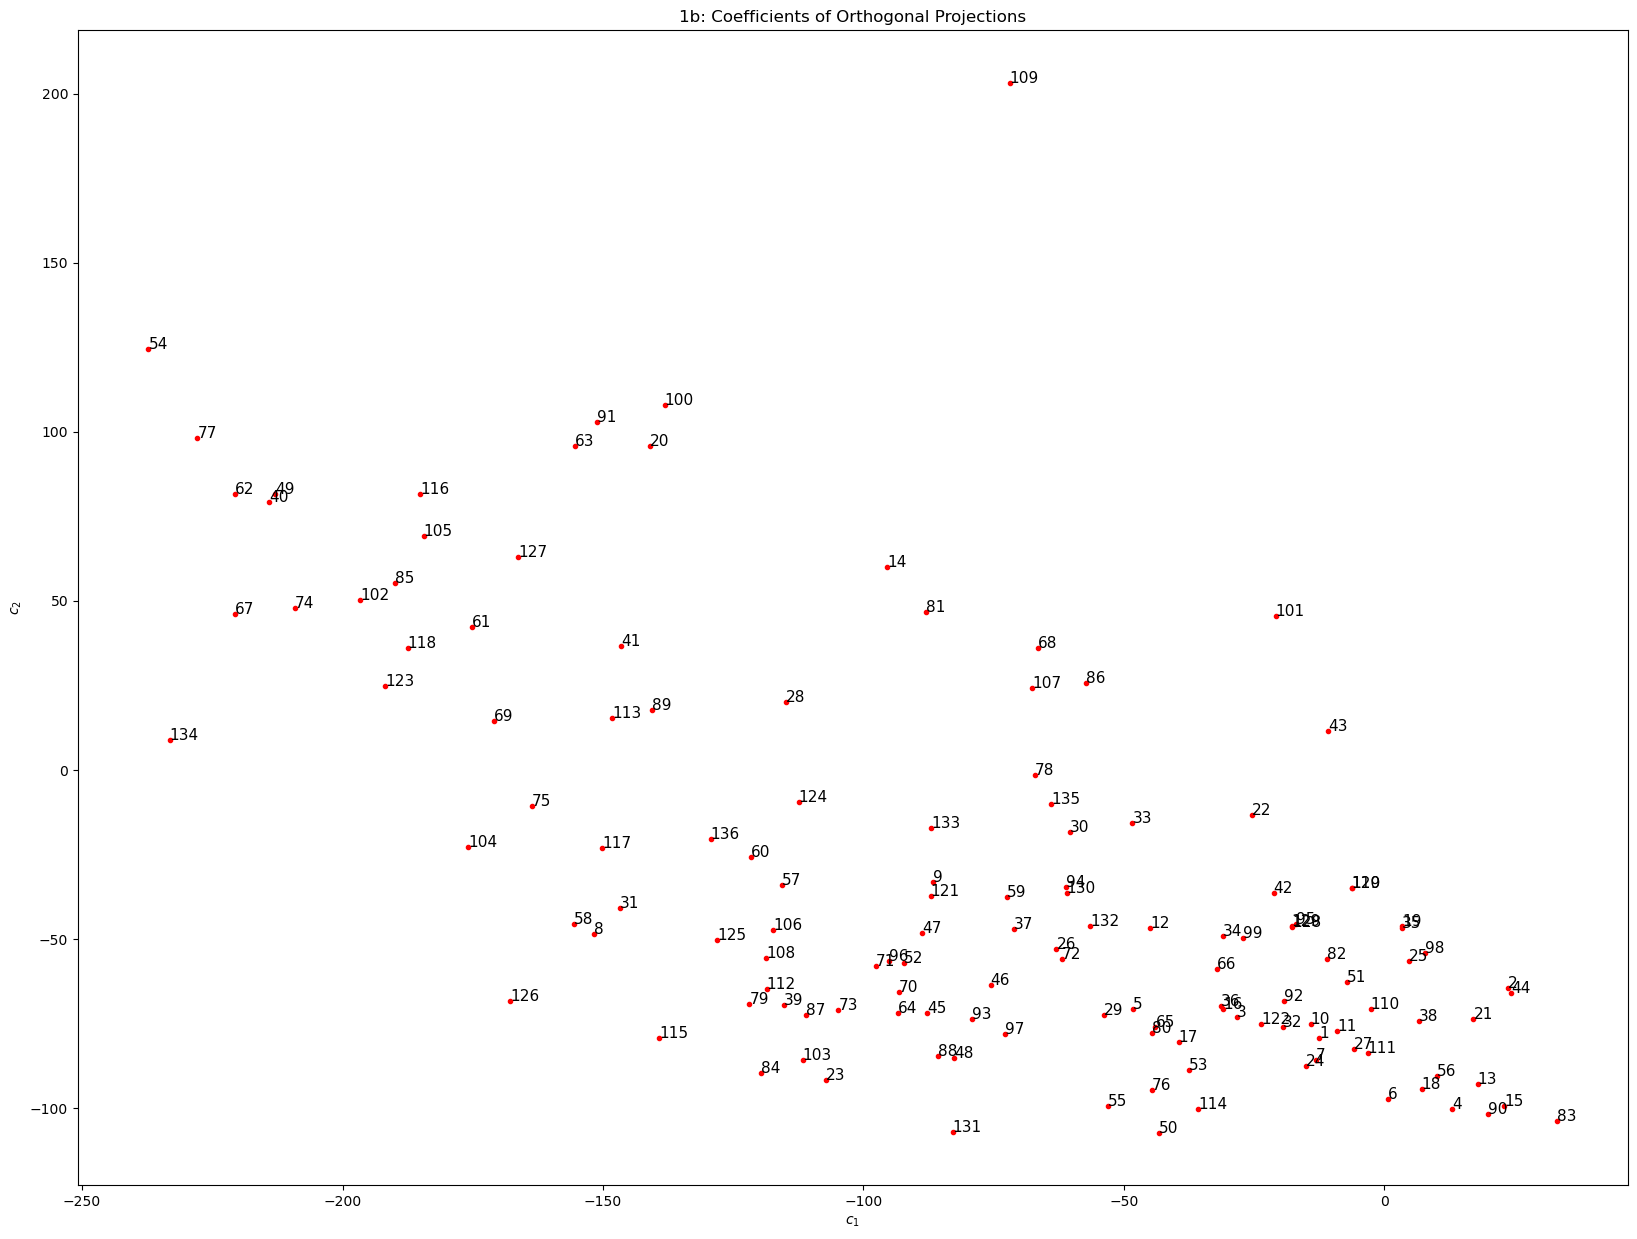

PyObject Text(0.5, 1.0, '1b: Coefficients of Orthogonal Projections')

In [3]:
# Problem 1b

v1 = V[:,1]'
v2 = V[:,2]'

c = vcat(v1,v2)*transpose(A)

c1 = c[[1],:]'
c2 = c[[2],:]'

figure(figsize=(20,15))
plot(c1, c2, "r.")
text.(c1, c2, string.(1:length(c1)), fontsize=11);

xlabel(L"c_1")
ylabel(L"c_2")
title("1b: Coefficients of Orthogonal Projections")

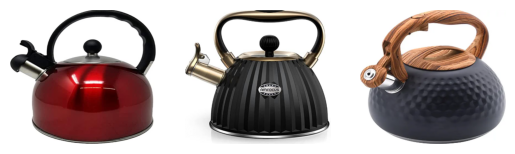

(-0.5, 379.5, 349.5, -0.5)

In [4]:
# Problem 1c
subplot(1,3,1)
plotimg(X[62,:])
subplot(1,3,2)
plotimg(X[40,:])
subplot(1,3,3)
plotimg(X[49,:])

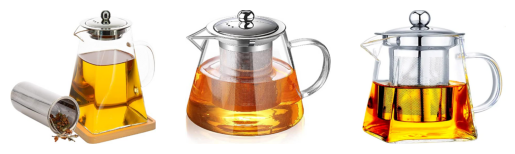

(-0.5, 379.5, 349.5, -0.5)

In [5]:
subplot(1,3,1)
plotimg(X[71,:])
subplot(1,3,2)
plotimg(X[52,:])
subplot(1,3,3)
plotimg(X[96,:])

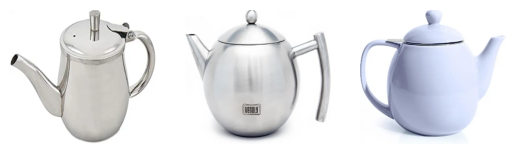

(-0.5, 379.5, 349.5, -0.5)

In [6]:
subplot(1,3,1)
plotimg(X[1,:])
subplot(1,3,2)
plotimg(X[10,:])
subplot(1,3,3)
plotimg(X[11,:])

## Problem 2 (2+2+2+2 points)

(from Strang pset 5.1)

If a $4\times 4$ matrix has $\det A = \frac{1}{2}$, find $\det(2A)$, $\det(-A)$, $\det(A^2)$, and $\det(A^{-1})$.

## Problem 3 (4+4+4+4 points)

(from Strang pset 5.1)

**True** or **false** (give a *reason* if true or a $2\times 2$ *counter-example* if false), using the properties of determinants.  $A$ and $B$ are square matrices.

**(a)** If $A$ is not invertible then $AB$ is not invertible.

**(b)** The determinant of $A$ is always the product of its pivots.

**(c)** $\det(A-B)$ always equals $\det(A) - \det(B)$.

**(d)** $AB$ and $BA$ must have the same determinant.

## Problem 4 (5+5+5 points)

**(a)** If $Q$ is a unitary matrix, from the properties of determinants explain why $\det Q$ must be \_\_\_\_\_\_\_\_ or \_\_\_\_\_\_\_\_.

**(b)** If $P$ is a $3 \times 3$ projection matrix onto a 2d subspace, then explain why its determinant must be \_\_\_\_\_\_\_\_.

**(c)** If $A$ is a $5 \times 5$ matrix that is anti-symmetric ($A^T = -A$), then explain why its determinant must be \_\_\_\_\_\_\_\_.   Try it for a few random matrices: if `B = randn(5,5); A = B - B'` produces an anti-symmetric `A`, and check `det(A)`.  (Be sure to load `using LinearAlgebra` first to get the `det` function.)

In [7]:
# Problem 4c
using LinearAlgebra
B = randn(5,5); A = B - B'
@show det(A)
B = randn(5,5); A = B - B'
@show det(A)
B = randn(5,5); A = B - B'
@show det(A)
B = randn(5,5); A = B - B'
@show det(A)
B = randn(5,5); A = B - B'
@show det(A)

det(A) = 2.5647472840384837e-17
det(A) = 4.07512922822606e-15
det(A) = -3.5522815447631965e-15
det(A) = -2.050904269229211e-15
det(A) = 5.086891618695728e-15


5.086891618695728e-15

## Problem 5 (10 points)

Find the determinant of the $6 \times 6$ matrix:
$$
A = \begin{pmatrix}
1 & -1 & 0 & 0 & 0 & 0\\
-1 & 2 & -1 & 0 & 0 & 0\\
0 & -1 & 2 & -1 & 0 & 0\\
0 & 0 & -1 & 2 & -1 & 0\\
0 & 0 & 0 & -1 & 2 & -1\\
0 & 0 & 0 & 0 & -1 & 2\\
\end{pmatrix} \, .
$$